<a href="https://colab.research.google.com/github/alejandro56664-adl/unal-data-mining/blob/main/Tarea3_JheisonMorales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Minería de Datos - 2021-I
## Tarea 3 - Asociación

![logo_unal](http://seeklogo.com/images/U/Universidad_Nacional_de_Colombia_-_Sede_Bogot_and__225_-logo-A05EAD6D0F-seeklogo.com.png)

PROFESORA ELIZABETH LEON GUZMAN

Presentado por:
- [Jheison Alejandro Morales Vásquez](mailto:jhmoralesva@unal.edu.co)

Una copia de esta libreta se puede encontrar en: https://github.com/alejandro56664-adl/unal-data-mining




In [43]:
!pip install pyfpgrowth
!pip install efficient-apriori

In [44]:
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from scipy import stats
from google.colab import files

In [45]:
import pyfpgrowth
from efficient_apriori import apriori

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
!pip install memory_profiler
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## 1.

Por cada un de las siguientes preguntas,

proveer un ejemplo de una regla de asociación del dominio de “market basket” que satisface las siguientes condiciones. También, describir si las reglas son interesantes (subjetivamente).

- Una regla que que tiene alto soporte y alta confianza
- Una regla que tiene razonablemente alto soporte pero baja confianza
- Una regla que tiene bajo soporte y baja confianza 
- Una regla que tiene bajo soporte y alta confianza

TODO

## 2.

¿Por qué el proceso de descubrimiento de reglas de asociación es relativamente simple comparado con la generación de grandes conjuntos de ítems en bases de datos transaccionales?

R/: 

Esto se debe a que la generación de conjuntos de items (si hace a fuerza bruta) requiere realizar varios scan (busquedas que involucran revisar todos los registros de la base de de datos transaccional) lo que eleva la complejidad del algoritmo. 

Esta complejidad es en notación Big O:

![\Large O(NMw)](https://latex.codecogs.com/svg.latex?\Large&space;O(NMw)) 

Donde: 

- N: Es el número total de transacciones.
- M: Es el número total de candidatos. ![ M=2k-1](https://latex.codecogs.com/svg.latex?&space;M=2k-1) 
- k: es el tamaño del _itemset_ o conjunto de ítems.

Por este motivo, se han planteado diferentes algoritmos que buscan reducir esta complejidad usando alguna de estas tres estrategias:

- Reducir el número de ítemset candidatos (M). _Principio Apriori_
- Reducir el número de comparaciones.
- Reducir el número de transacciones a evaluar (N).


## 3.

Considere el siguiente conjunto de datos:


In [48]:
dic_3 = { 
        'TID': ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10'],
        'Items': ['milk, beer, diapers',
                  'bread, butter, milk',
                  'milk, diapers, cookies',
                  'bread, butter, cookies',
                  'beer, cookies, diapers',
                  'milk, diapers, bread, butter',
                  'bread, butter, diapers',
                  'beer, diapers',
                  'milk, diapers, bread, butter',
                  'beer, cookies']
       }
df_items_3 = pd.DataFrame.from_dict(dic_3)
df_items_3.set_index('TID', inplace=True)
df_items_3.head()

,Items
TID,
T01,"milk, beer, diapers"
T02,"bread, butter, milk"
T03,"milk, diapers, cookies"
T04,"bread, butter, cookies"
T05,"beer, cookies, diapers"


- ¿cuál es el número máximo de reglas de asociación que se pueden generar? (incluyendo reglas con soporte 0)

In [49]:
def get_list_transactions(s):
  result = []
  all = []
  values = s.values
  for i in range(len(values)):
    values_aux = values[i].split(', ')
    result.append(values_aux)
    all = all + values_aux
  
  items = list(set(all))
  
  return result, items


In [50]:
list_transactions, items = get_list_transactions(df_items_3['Items'])


In [51]:
list_transactions

[['milk', 'beer', 'diapers'],
 ['bread', 'butter', 'milk'],
 ['milk', 'diapers', 'cookies'],
 ['bread', 'butter', 'cookies'],
 ['beer', 'cookies', 'diapers'],
 ['milk', 'diapers', 'bread', 'butter'],
 ['bread', 'butter', 'diapers'],
 ['beer', 'diapers'],
 ['milk', 'diapers', 'bread', 'butter'],
 ['beer', 'cookies']]

In [52]:
items

['cookies', 'diapers', 'beer', 'bread', 'milk', 'butter']

In [53]:
d = len(items)
d

6

In [54]:
R = 3**d + 2**(d + 1) + 1
R

858

- ¿Cuál es el tamaño máximo de los conjuntos de items frecuentes que se pueden extraer (asumir el umbral de minsoporte > 0)?


In [55]:
2**d

64

- Escribir una regla que contenga 3 ítems que se genere de este conjunto de datos.

  - R/: { milk, diapers} → { beer }

In [56]:
#TODO optimizar esto con lambdas o closures
def get_all_3_itemsets(items):
  itemset = []
  k = 3
  d = len(items)
  d_k = d - k + 1 #para contar desde 0
  for i in range(0, d_k):
    for j in range(i+1, d_k + 1):
      for k1 in range(j+1, d_k + 2):
        itemset.append([items[i], items[j], items[k1]])
  return itemset, k

def get_all_2_itemsets(items):
  itemset = []
  k = 2
  d = len(items)
  d_k = d - k + 1 #para contar desde 0
  for i in range(0, d_k):
    for j in range(i+1, d_k + 1):
        itemset.append([items[i], items[j]])
  return itemset, k

def get_all_1_itemsets(items):
  itemset = []
  k = 1
  d = len(items)
  d_k = d - k + 1 #para contar desde 0
  for i in range(0, d_k):
        itemset.append([items[i]])
  return itemset, k


- Encontrar un conjunto de items (de tamaño mayor a 2) con el valor de soporte máximo.

In [57]:
k3_itemsets, _ = get_all_3_itemsets(items)
k3_itemsets

[['cookies', 'diapers', 'beer'],
 ['cookies', 'diapers', 'bread'],
 ['cookies', 'diapers', 'milk'],
 ['cookies', 'diapers', 'butter'],
 ['cookies', 'beer', 'bread'],
 ['cookies', 'beer', 'milk'],
 ['cookies', 'beer', 'butter'],
 ['cookies', 'bread', 'milk'],
 ['cookies', 'bread', 'butter'],
 ['cookies', 'milk', 'butter'],
 ['diapers', 'beer', 'bread'],
 ['diapers', 'beer', 'milk'],
 ['diapers', 'beer', 'butter'],
 ['diapers', 'bread', 'milk'],
 ['diapers', 'bread', 'butter'],
 ['diapers', 'milk', 'butter'],
 ['beer', 'bread', 'milk'],
 ['beer', 'bread', 'butter'],
 ['beer', 'milk', 'butter'],
 ['bread', 'milk', 'butter']]

In [58]:
def get_support(k_itemsets, transactions):
  # implemetnación por fuerza bruta
  l = len(k_itemsets)
  supports = np.zeros(l)
  for t in transactions:
    for i in range(l):
      i_s = k_itemsets[i]
      if len(t) > len(i_s):
        supports[i] = supports[i] + int(set(i_s).issubset(t))
  return supports
        

In [59]:
k3_itemsets_supp = get_support(k3_itemsets, list_transactions)
k3_itemsets_supp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 0.,
       0., 0., 2.])

In [60]:
df_support_3 = pd.DataFrame({'support_count': k3_itemsets_supp, 'k3_itemsets': k3_itemsets})
df_support_3[ df_support_3['support_count'] > 0]

,support_count,k3_itemsets
13,2.0,"[diapers, bread, milk]"
14,2.0,"[diapers, bread, butter]"
15,2.0,"[diapers, milk, butter]"
19,2.0,"[bread, milk, butter]"


- Encontrar un par de ítems (a y b) tal que las reglas a → b y b → a tengan la misma confianza.

In [61]:
def get_support_df(items, list_transactions, fn_get_k_itemsets):
  k_itemsets, k = fn_get_k_itemsets(items)
  k_itemsets_s = get_support(k_itemsets, list_transactions)
  N = len(list_transactions)
  l = len(k_itemsets)
  df = pd.DataFrame({'k_itemsets': k_itemsets, 'k': np.ones(l)*k, 'support_count': k_itemsets_s})
  df['support'] = df['support_count']/N
  return df

In [62]:
df_support_2 = get_support_df(items, list_transactions, get_all_2_itemsets)

#filtramos los que tienen support_count > 0
df_support_2 = df_support_2[ df_support_2['support_count'] > 0]
df_support_2

,k_itemsets,k,support_count,support
0,"[cookies, diapers]",2.0,2.0,0.2
1,"[cookies, beer]",2.0,1.0,0.1
2,"[cookies, bread]",2.0,1.0,0.1
3,"[cookies, milk]",2.0,1.0,0.1
4,"[cookies, butter]",2.0,1.0,0.1
5,"[diapers, beer]",2.0,2.0,0.2
6,"[diapers, bread]",2.0,3.0,0.3
7,"[diapers, milk]",2.0,4.0,0.4
8,"[diapers, butter]",2.0,3.0,0.3
10,"[beer, milk]",2.0,1.0,0.1


In [63]:
df_support_1 = get_support_df(items, list_transactions, get_all_1_itemsets)

#desempaquetamos del array ['item'] -> 'item'
df_support_1['k_itemsets'] = df_support_1['k_itemsets'].map(lambda s: s[0])

df_support_1

,k_itemsets,k,support_count,support
0,cookies,1.0,4.0,0.4
1,diapers,1.0,7.0,0.7
2,beer,1.0,4.0,0.4
3,bread,1.0,5.0,0.5
4,milk,1.0,5.0,0.5
5,butter,1.0,5.0,0.5


In [64]:
# Ahora que ya vimos que funciona creamos un closure con acceso al diccionario
def add_a_b_metrics(k1_itemset):

  #convertimos a el df a diccionario
  dict_support = dict(zip(k1_itemset['k_itemsets'].values, k1_itemset['support_count'].values))

  print(dict_support)
  #retornamos un closure con acceso al diccionario
  def add_metrics_cols(row):

    #calculamos la confianza = supp(a->b)/supp(a)
    itemset = row['k_itemsets'] # [a, b]
    
    supp_a_b = row['support_count']

    supp_a = dict_support[itemset[0]]
    supp_b = dict_support[itemset[1]]
    

    row['c(a->b)'] = supp_a_b/supp_a
    row['c(b->a)'] = supp_a_b/supp_b
    row['I(a,b)'] = supp_a_b/(supp_b*supp_a)
    return row
  
  return add_metrics_cols

In [65]:
df_support_2_metrics = df_support_2.apply(add_a_b_metrics(df_support_1), axis=1)
df_support_2_metrics

{'cookies': 4.0, 'diapers': 7.0, 'beer': 4.0, 'bread': 5.0, 'milk': 5.0, 'butter': 5.0}


,k_itemsets,k,support_count,support,c(a->b),c(b->a),"I(a,b)"
0,"[cookies, diapers]",2.0,2.0,0.2,0.500000,0.285714,0.071429
1,"[cookies, beer]",2.0,1.0,0.1,0.250000,0.250000,0.062500
2,"[cookies, bread]",2.0,1.0,0.1,0.250000,0.200000,0.050000
3,"[cookies, milk]",2.0,1.0,0.1,0.250000,0.200000,0.050000
4,"[cookies, butter]",2.0,1.0,0.1,0.250000,0.200000,0.050000
5,"[diapers, beer]",2.0,2.0,0.2,0.285714,0.500000,0.071429
6,"[diapers, bread]",2.0,3.0,0.3,0.428571,0.600000,0.085714
7,"[diapers, milk]",2.0,4.0,0.4,0.571429,0.800000,0.114286
8,"[diapers, butter]",2.0,3.0,0.3,0.428571,0.600000,0.085714
10,"[beer, milk]",2.0,1.0,0.1,0.250000,0.200000,0.050000


In [66]:
df_support_2_metrics[ df_support_2_metrics['c(a->b)'] == df_support_2_metrics['c(b->a)']]

,k_itemsets,k,support_count,support,c(a->b),c(b->a),"I(a,b)"
1,"[cookies, beer]",2.0,1.0,0.1,0.25,0.25,0.0625
12,"[bread, milk]",2.0,3.0,0.3,0.60,0.60,0.1200
13,"[bread, butter]",2.0,5.0,0.5,1.00,1.00,0.2000
14,"[milk, butter]",2.0,3.0,0.3,0.60,0.60,0.1200


## 4. 

Dado la siguiente base de datos X:


In [67]:
dic_4 = { 
        'TID': ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08'],
        'Items': ['A, B, C, D',
                  'A, C, D, F',
                  'C, D, E, G, A',
                  'A, D, F, B',
                  'B, C, G',
                  'D, F, G',
                  'A, B, G',
                  'C, D, F, G']
       }
df_items_4 = pd.DataFrame(dic_4)
df_items_4.set_index('TID', inplace=True)
df_items_4

,Items
TID,
T01,"A, B, C, D"
T02,"A, C, D, F"
T03,"C, D, E, G, A"
T04,"A, D, F, B"
T05,"B, C, G"
T06,"D, F, G"
T07,"A, B, G"
T08,"C, D, F, G"


Usando valores de umbral de soporte = 25 % y confianza = 60 %, encuentre:
- Todos los conjuntos de ítems en la base de datos X


In [68]:
list_transactions_4, items_4 = get_list_transactions(df_items_4['Items'])

In [69]:
list_transactions_4

[['A', 'B', 'C', 'D'],
 ['A', 'C', 'D', 'F'],
 ['C', 'D', 'E', 'G', 'A'],
 ['A', 'D', 'F', 'B'],
 ['B', 'C', 'G'],
 ['D', 'F', 'G'],
 ['A', 'B', 'G'],
 ['C', 'D', 'F', 'G']]

In [70]:
df_p4_support_2 = get_support_df(items_4, list_transactions_4, get_all_2_itemsets)
df_p4_support_3 = get_support_df(items_4, list_transactions_4, get_all_3_itemsets)

df_p4_support = pd.concat([df_p4_support_3, df_p4_support_2])

#filtramos los que tienen support_count > 0
df_p4_support = df_p4_support[ (df_p4_support['support'] > 0.25) & (df_p4_support['k'] == 2)]
df_p4_support

,k_itemsets,k,support_count,support
7,"[B, A]",2.0,3.0,0.375
11,"[D, A]",2.0,4.0,0.500
12,"[D, G]",2.0,3.0,0.375
13,"[D, F]",2.0,4.0,0.500
14,"[D, C]",2.0,4.0,0.500
17,"[A, C]",2.0,3.0,0.375
19,"[G, C]",2.0,3.0,0.375


In [71]:
df_p4_support_1 = get_support_df(items_4, list_transactions_4, get_all_1_itemsets)

#desempaquetamos del array ['item'] -> 'item'
df_p4_support_1['k_itemsets'] = df_p4_support_1['k_itemsets'].map(lambda s: s[0])

df_p4_support_1

,k_itemsets,k,support_count,support
0,E,1.0,1.0,0.125
1,B,1.0,4.0,0.500
2,D,1.0,6.0,0.750
3,A,1.0,5.0,0.625
4,G,1.0,5.0,0.625
5,F,1.0,4.0,0.500
6,C,1.0,5.0,0.625


- Reglas de asociación fuertes para la base de datos X


In [72]:
df_p4_support_metrics = df_p4_support.apply(add_a_b_metrics(df_p4_support_1), axis=1)
df_p4_support_metrics

{'E': 1.0, 'B': 4.0, 'D': 6.0, 'A': 5.0, 'G': 5.0, 'F': 4.0, 'C': 5.0}


,k_itemsets,k,support_count,support,c(a->b),c(b->a),"I(a,b)"
7,"[B, A]",2.0,3.0,0.375,0.750000,0.6,0.150000
11,"[D, A]",2.0,4.0,0.500,0.666667,0.8,0.133333
12,"[D, G]",2.0,3.0,0.375,0.500000,0.6,0.100000
13,"[D, F]",2.0,4.0,0.500,0.666667,1.0,0.166667
14,"[D, C]",2.0,4.0,0.500,0.666667,0.8,0.133333
17,"[A, C]",2.0,3.0,0.375,0.600000,0.6,0.120000
19,"[G, C]",2.0,3.0,0.375,0.600000,0.6,0.120000


In [73]:
df_p4_support_metrics[(df_p4_support_metrics['c(a->b)'] > 0.6) | (df_p4_support_metrics['c(b->a)'] > 0.6)]

,k_itemsets,k,support_count,support,c(a->b),c(b->a),"I(a,b)"
7,"[B, A]",2.0,3.0,0.375,0.750000,0.6,0.150000
11,"[D, A]",2.0,4.0,0.500,0.666667,0.8,0.133333
13,"[D, F]",2.0,4.0,0.500,0.666667,1.0,0.166667
14,"[D, C]",2.0,4.0,0.500,0.666667,0.8,0.133333


- Analice las asociaciones engañosas para el conjunto de reglas obtenido en el numeral anterior.

**Notas**: Engañosas son las reglas que tienen un valor interesante de 'confianza' sin embargo pueden ser resultado del azar mas que de un comportamiento real reflejado por los datos. 


Al revisar el lift(I) vemos que las reglas las engañosas son las que estan bajo del umbral 1, por lo que se puede concluir que la relación es debil, aunque aparecen juntos C->D y D->F aparecen aún con menos frecuencia de lo que se esperaría por azar.

## 5. 

El algoritmo Apriori usa estrategías de generación y conteo para derivar conjuntos de items frecuentes. 

| id | items   |
| -- | ------- |
| 1  | a,b,d,e |
| 2  | b,c,d   |
| 3  | a,b,d,e |
| 4  | a,c,d,e |
| 5  | b,c,d,e |
| 6  | b,d,e   |
| 7  | c,d     |
| 8  | a,b,c   |
| 9  | a,d,e   |
| 10 | b,d     |

Conjuntos de item de tamaño k + 1 son creados de conjuntos de items de tamaño k. Un conjunto candidato es eliminado si uno de sus subconjuntos no es frecuente en la fase de poda. Supongamos que el algoritmo Apriori es aplicado a los datos de la siguiente tabla con un soporte mínimo de 30% (ejercicio realizado en clase).

- Dibujar el lattice de los conjuntos de items y etiquetar cada nodo con las siguientes letras:
  - i. N: si el conjunto no es considerado candidato
  - ii. F: si el conjunto candidato es frecuente
  - iii. I: si el conjunto candidato no es frecuente

  ![lattice_anotado](https://github.com/alejandro56664-adl/unal-data-mining/blob/main/assets/Tarea3_lattice/Diapositiva1.png?raw=true)

| Itemset | Conteo | Estado |
| ------- | ------ | ------ |
| ab      | 3      | F      |
| ac      | 2      | I      |
| ad      | 1      | I      |
| ae      | 4      | F      |
| bc      | 3      | F      |
| bd      | 5      | F      |
| be      | 4      | F      |
| cd      | 4      | F      |
| ce      | 2      | I      |
| de      | 6      | F      |


| Itemset | Conteo | Estado |
| ------- | ------ | ------ |
| abe     | 2      | I      |
| bcd     | 2      | I      |
| bde     | 3      | F      |

- ¿Cuál es el porcentaje de conjuntos de items frecuente?

R/: 

![\Large F_c=\frac{13}{31}\approx0.42](https://latex.codecogs.com/svg.latex?\Large&space;F_c=\frac{13}{31}\approx42%) 


- ¿Cuál es el radio de poda en este conjunto de datos? (El radio de poda es definido como el porcentaje de conjuntos de items no considerados a ser candidatos, ya sea por que no son generados durante la etapa de generación de candidatos, o por que son podados en la etapa de poda).

R/:

![\Large N_c=\frac{12}{31}\approx0.39](https://latex.codecogs.com/svg.latex?\Large&space;N_c=\frac{12}{31}\approx39%) 

- ¿Cuál es la rata de falsa alarma? (porcentaje de los conjuntos de items candidatos que son encontrados NO frecuentes después de calcular el soporte).

R/: 

![\Large I_c=\frac{5}{13}\approx0.38](https://latex.codecogs.com/svg.latex?\Large&space;I_c=\frac{5}{13}\approx38%) 

**Notas**: frecuentes se queda, identificar los no frecuentes,
los q se podan son los de N
F, I, candidatos pero no son frecuentes, al no ser frecuentes se eliminan, en adelante es poda
Frecuentes: pasan el umbral del soporte
al no pasar el umbral no es frecuente. N es el q se poda

In [74]:
dic_5 = { 
        'TID': [i for i in range(10)],
        'Items': ['a, b, d, e',
                  'b, c, d',
                  'a, b, d, e',
                  'a, c, d, e',
                  'b, c, d, e',
                  'b, d, e',
                  'c, d',
                  'a, b, c',
                  'a, d, e',
                  'b, d']
       }
df_items_5 = pd.DataFrame(dic_5)
df_items_5.set_index('TID', inplace=True)
df_items_5

,Items
TID,
0,"a, b, d, e"
1,"b, c, d"
2,"a, b, d, e"
3,"a, c, d, e"
4,"b, c, d, e"
5,"b, d, e"
6,"c, d"
7,"a, b, c"
8,"a, d, e"


## 6. 

Dada la siguiente base de datos transaccional Y:


In [75]:
dic_6 = { 
        'TID': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
        'Items': ['A, B, C',
                  'A, C, D, E',
                  'A, B, D',
                  'A, C, F',
                  'A, B',
                  'A, E, F',
                  'A, B, D, E, F',
                  'A, F',
                  'B, D, E',
                  'B, D, E, F',
                  'B, C, D, E',
                  'C, D, E']
       }
df_items_6 = pd.DataFrame(dic_6)
df_items_6.set_index('TID', inplace=True)
df_items_6

,Items
TID,
1,"A, B, C"
2,"A, C, D, E"
3,"A, B, D"
4,"A, C, F"
5,"A, B"
6,"A, E, F"
7,"A, B, D, E, F"
8,"A, F"
9,"B, D, E"


Usar Apriori y FP-Growth para encontrar los conjuntos de ítems frecuentes con mínimo soporte de 2. Tratar con varios valores de confianza. Ordenar los conjuntos resultados y analizar resultados de cada algoritmo. Comparar eficiencia de los dos procesos de mineria. Repetir con soporte de 3 y comparar los resultados.

In [76]:
list_transactions_6, items_6 = get_list_transactions(df_items_6['Items'])
list_transactions_6

[['A', 'B', 'C'],
 ['A', 'C', 'D', 'E'],
 ['A', 'B', 'D'],
 ['A', 'C', 'F'],
 ['A', 'B'],
 ['A', 'E', 'F'],
 ['A', 'B', 'D', 'E', 'F'],
 ['A', 'F'],
 ['B', 'D', 'E'],
 ['B', 'D', 'E', 'F'],
 ['B', 'C', 'D', 'E'],
 ['C', 'D', 'E']]

In [77]:
N = len(list_transactions_6)

### 6.1

Se realiza la prueba con _min\_soporte = 2_


In [78]:
def run_test1(transactions, min_support, min_confidence):
  print('Prueba con Apriori')
  itemsets, rules = apriori(transactions, min_support=min_support/N, min_confidence=min_confidence)

  print('Cantidad de reglas: ', len(rules))
  for r in rules:
    print(r)

  print('\nPrueba con FP-Growth')

  patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
  rules = pyfpgrowth.generate_association_rules(patterns, min_confidence)
  print('Cantidad de reglas: ', len(rules))
  return rules


In [79]:
min_soporte = 2
min_confianza = 0.8

In [80]:
 run_test1(list_transactions_6, min_soporte, min_confianza)

Prueba con Apriori
Cantidad de reglas:  16
{E} -> {D} (conf: 0.857, supp: 0.500, lift: 1.469, conv: 2.917)
{D} -> {E} (conf: 0.857, supp: 0.500, lift: 1.469, conv: 2.917)
{F} -> {A} (conf: 0.800, supp: 0.333, lift: 1.200, conv: 1.667)
{C, E} -> {D} (conf: 1.000, supp: 0.250, lift: 1.714, conv: 416666666.667)
{C, D} -> {E} (conf: 1.000, supp: 0.250, lift: 1.714, conv: 416666666.667)
{B, E} -> {D} (conf: 1.000, supp: 0.333, lift: 1.714, conv: 416666666.667)
{B, D} -> {E} (conf: 0.800, supp: 0.333, lift: 1.371, conv: 2.083)
{D, F} -> {B} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{B, F} -> {D} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{B, F} -> {E} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{D, F} -> {E} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{D, E, F} -> {B} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{B, E, F} -> {D} (conf: 1.000, supp: 0.167, lift: 1.714, conv: 416666666.667)
{B, D, F} -> {E} 

{('B', 'D'): (('E',), 0.8),
 ('B', 'D', 'F'): (('E',), 1.0),
 ('B', 'E'): (('D',), 1.0),
 ('B', 'E', 'F'): (('D',), 1.0),
 ('B', 'F'): (('D', 'E'), 1.0),
 ('C', 'D'): (('E',), 1.0),
 ('C', 'E'): (('D',), 1.0),
 ('D', 'E', 'F'): (('B',), 1.0),
 ('D', 'F'): (('B', 'E'), 1.0)}

### 6.2

Se realiza la prueba con _min\_soporte = 3_

In [81]:
min_soporte = 3
min_confianza = 0.8

In [82]:
 run_test1(list_transactions_6, min_soporte, min_confianza)

Prueba con Apriori
Cantidad de reglas:  7
{E} -> {D} (conf: 0.857, supp: 0.500, lift: 1.469, conv: 2.917)
{D} -> {E} (conf: 0.857, supp: 0.500, lift: 1.469, conv: 2.917)
{F} -> {A} (conf: 0.800, supp: 0.333, lift: 1.200, conv: 1.667)
{C, E} -> {D} (conf: 1.000, supp: 0.250, lift: 1.714, conv: 416666666.667)
{C, D} -> {E} (conf: 1.000, supp: 0.250, lift: 1.714, conv: 416666666.667)
{B, E} -> {D} (conf: 1.000, supp: 0.333, lift: 1.714, conv: 416666666.667)
{B, D} -> {E} (conf: 0.800, supp: 0.333, lift: 1.371, conv: 2.083)

Prueba con FP-Growth
Cantidad de reglas:  4


{('B', 'D'): (('E',), 0.8),
 ('B', 'E'): (('D',), 1.0),
 ('C', 'D'): (('E',), 1.0),
 ('C', 'E'): (('D',), 1.0)}

In [83]:
# Pruebas de rendimiento 
%%timeit
itemsets, rules = apriori(list_transactions_6, min_support=0, min_confidence=0)

The slowest run took 5.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.65 ms per loop


In [84]:
%%timeit
patterns = pyfpgrowth.find_frequent_patterns(list_transactions_6, 0)
rules = pyfpgrowth.generate_association_rules(patterns, 0)


1000 loops, best of 5: 1.15 ms per loop


Conclusión:

La cantidad de reglas generadas por la implementación algoritmo FP-Growth es menor a las generadas por la implmentación del algoritmo Apriori usado en estas pruebas, sin embargo esto sea debido a las decisiones de diseño tomadas en el primero para realizar la poda. Aunque en la ejecución se puede ver una leve diferencia entre los tiempos de ejecución el tamaño del conjunto de datos es demasiado pequeño para sacar conclusiones. Sin embargo debido al conocimiento del funcionamiento de los algoritmos, se puede decir que es una respuesta esperaa.

## 7. 

Usando el conjunto de datos del punto 5
- realizar la tabla de contingencia para las siguientes reglas: b→c , a→d , b→d , e→c , c→a

- usar las tablas de contigencia del punto anterior para computar y “realizar un ranking” de las reglas usando:
 - i. soporte
 - ii. confianza
 - iii. lift

In [85]:
def get_k2_metrics(s, minsop):
  list_transactions, items = get_list_transactions(s)
  df = get_support_df(items, list_transactions, get_all_2_itemsets)
  df = df[ (df['support'] > minsop) & (df['k'] == 2)]

  df_1 = get_support_df(items, list_transactions, get_all_1_itemsets)

  #desempaquetamos del array ['item'] -> 'item'
  df_1['k_itemsets'] = df_1['k_itemsets'].map(lambda s: s[0])

  return df.apply(add_a_b_metrics(df_1), axis=1)

In [86]:
def build_crosstab(rule, transactions=[]):
  a = rule[0]
  not_a = '~'+rule[0]

  b = rule[1]
  not_b = '~'+rule[1]

  f11 = 0 #'f11'
  f10 = 0 #'f10'
  f01 = 0 #'f01'
  f00 = 0 #'f00'

  N = len(transactions) #'N'
  set_rule = set(rule)

  for t in transactions:

    not_a_in_t =  not a in t
    not_b_in_t =  not b in t
    f11 = f11 + int(set_rule.issubset(t))
    f01 = f01 + int(b in t and not_a_in_t)
    f10 = f10 + int(a in t and not_b_in_t)
    f00 = f00 + int(not_a_in_t and not_b_in_t)


  fp1 = f11 + f01 #'f+1' 
  fp0 = f10 + f00 #'f+0'
  f1p = f11 + f10 #'f1+'
  f0p = f01 + f00 #'f0+'


  crosstab = { 
                b:      [f11, f01, fp1],
                not_b:  [f10, f00, fp0],
                '':     [f1p, f0p, N] 
             }

  metrics = {
      'soporte': f11/N,
      'confianza': f11/f1p,
      'lift': f11/(fp1*f1p)
  }

  return pd.DataFrame(crosstab, index= [a, not_a, '']), metrics

In [87]:
list_transactions_7, items_7 = get_list_transactions(df_items_5['Items'])

In [88]:
reglas = []

In [89]:
#b→c
ct, m = build_crosstab(['b', 'c'], list_transactions_7)
m['regla'] = 'b→c'
reglas.append(m)
print(m)
ct

{'soporte': 0.3, 'confianza': 0.42857142857142855, 'lift': 0.08571428571428572, 'regla': 'b→c'}


,c,~c,
b,3,4,7
~b,2,1,3
,5,5,10


In [90]:
#a→d
ct, m = build_crosstab(['a', 'd'], list_transactions_7)
m['regla'] = 'a→d'
reglas.append(m)
print(m)
ct

{'soporte': 0.4, 'confianza': 0.8, 'lift': 0.08888888888888889, 'regla': 'a→d'}


,d,~d,
a,4,1,5
~a,5,0,5
,9,1,10


In [91]:
#e→c
ct, m = build_crosstab(['e', 'c'], list_transactions_7)
m['regla'] = 'e→c'
reglas.append(m)
print(m)
ct

{'soporte': 0.2, 'confianza': 0.3333333333333333, 'lift': 0.06666666666666667, 'regla': 'e→c'}


,c,~c,
e,2,4,6
~e,3,1,4
,5,5,10


In [92]:
#c→a
ct, m = build_crosstab(['c', 'a'], list_transactions_7)
m['regla'] = 'c→a'
reglas.append(m)
print(m)
ct

{'soporte': 0.2, 'confianza': 0.4, 'lift': 0.08, 'regla': 'c→a'}


,a,~a,
c,2,3,5
~c,3,2,5
,5,5,10


In [93]:
pd.DataFrame(reglas)

,soporte,confianza,lift,regla
0,0.3,0.428571,0.085714,b→c
1,0.4,0.800000,0.088889,a→d
2,0.2,0.333333,0.066667,e→c
3,0.2,0.400000,0.080000,c→a


In [94]:
get_k2_metrics(df_items_5['Items'], minsop=0.25)


{'d': 9.0, 'e': 6.0, 'a': 5.0, 'c': 5.0, 'b': 7.0}


,k_itemsets,k,support_count,support,c(a->b),c(b->a),"I(a,b)"
0,"[d, e]",2.0,6.0,0.6,0.666667,1.000000,0.111111
1,"[d, a]",2.0,4.0,0.4,0.444444,0.800000,0.088889
2,"[d, c]",2.0,3.0,0.3,0.333333,0.600000,0.066667
3,"[d, b]",2.0,5.0,0.5,0.555556,0.714286,0.079365
4,"[e, a]",2.0,4.0,0.4,0.666667,0.800000,0.133333
6,"[e, b]",2.0,4.0,0.4,0.666667,0.571429,0.095238
8,"[a, b]",2.0,3.0,0.3,0.600000,0.428571,0.085714
9,"[c, b]",2.0,3.0,0.3,0.600000,0.428571,0.085714


## 8. 

Importar el conjunto de datos marketBasquet.csv. Extraer reglas de asociación utilizando diferentes valores mínimos de confíanza. Analice los resultados. Reporte los itemsets frecuentes con sus respectivos valores de soporte. 

In [95]:
#uploaded = files.upload()
!wget https://raw.githubusercontent.com/alejandro56664-adl/unal-data-mining/main/datasets/marketBasket.csv

--2021-05-01 02:30:35--  https://raw.githubusercontent.com/alejandro56664-adl/unal-data-mining/main/datasets/marketBasket.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413 [text/plain]
Saving to: ‘marketBasket.csv.1’

marketBasket.csv.1  100%[===================>]     413  --.-KB/s    in 0s      

2021-05-01 02:30:36 (15.4 MB/s) - ‘marketBasket.csv.1’ saved [413/413]



In [96]:
!cat marketBasket.csv


ID;Leche;Cerveza;Pa�ales;Pan;Mantequilla;Galletas
1;true;true;true;false;false;false
2;true;false;false;true;true;false
3;true;false;true;false;false;true
4;false;false;false;true;true;true
5;false;true;true;false;false;true
6;true;false;true;true;true;false
7;false;false;true;true;true;false
8;false;true;true;false;false;false
9;true;false;true;true;true;false
10;false;true;false;false;false;true


In [97]:
#Eliminamos las primeras dos lineas (linea en blanco, la segunda linea tiene un error)
!sed '2d' marketBasket.csv > marketBasket1.csv

In [98]:
!cat marketBasket1.csv


1;true;true;true;false;false;false
2;true;false;false;true;true;false
3;true;false;true;false;false;true
4;false;false;false;true;true;true
5;false;true;true;false;false;true
6;true;false;true;true;true;false
7;false;false;true;true;true;false
8;false;true;true;false;false;false
9;true;false;true;true;true;false
10;false;true;false;false;false;true


In [99]:

df_market_basket = pd.read_csv('marketBasket1.csv', sep=';', names=['ID', 'Leche', 'Cerveza', 'Pañales','Pan', 'Mantequilla', 'Galletas'], index_col='ID')
df_market_basket

,Leche,Cerveza,Pañales,Pan,Mantequilla,Galletas
ID,,,,,,
1,True,True,True,False,False,False
2,True,False,False,True,True,False
3,True,False,True,False,False,True
4,False,False,False,True,True,True
5,False,True,True,False,False,True
6,True,False,True,True,True,False
7,False,False,True,True,True,False
8,False,True,True,False,False,False
9,True,False,True,True,True,False


In [100]:
transactions = df_market_basket.apply(lambda s: s.index[s].tolist(), axis=1).values.tolist()
transactions

[['Leche', 'Cerveza', 'Pañales'],
 ['Leche', 'Pan', 'Mantequilla'],
 ['Leche', 'Pañales', 'Galletas'],
 ['Pan', 'Mantequilla', 'Galletas'],
 ['Cerveza', 'Pañales', 'Galletas'],
 ['Leche', 'Pañales', 'Pan', 'Mantequilla'],
 ['Pañales', 'Pan', 'Mantequilla'],
 ['Cerveza', 'Pañales'],
 ['Leche', 'Pañales', 'Pan', 'Mantequilla'],
 ['Cerveza', 'Galletas']]

In [101]:
def build_df_from_rules(rules):
  l = []
  for r in rules_s_2:
    l.append({ 'Rule':  f'{r.lhs} -> {r.rhs}', 'Supp': r.support, 'Conf': r.confidence, 'Lift': r.lift })
  
  df = pd.DataFrame(l)
  df = df.set_index('Rule')
  return df


Reporte los itemsets frecuentes con sus respectivos valores de soporte. Analice los resultados y discuta las diferencias con el esquema que no posee un filtro de atributos.

In [102]:
itemsets_s_2, rules_s_2 = apriori(transactions, min_support=2/N, min_confidence=0.65)
df_rules_s_2 = build_df_from_rules(rules_s_2)
df_rules_s_2

,Supp,Conf,Lift
Rule,,,
"('Cerveza',) -> ('Pañales',)",0.3,0.750000,1.071429
"('Leche',) -> ('Pañales',)",0.4,0.800000,1.142857
"('Pan',) -> ('Mantequilla',)",0.5,1.000000,2.000000
"('Mantequilla',) -> ('Pan',)",0.5,1.000000,2.000000
"('Leche', 'Pan') -> ('Mantequilla',)",0.3,1.000000,2.000000
"('Leche', 'Mantequilla') -> ('Pan',)",0.3,1.000000,2.000000
"('Mantequilla', 'Pañales') -> ('Leche',)",0.2,0.666667,1.333333
"('Leche', 'Mantequilla') -> ('Pañales',)",0.2,0.666667,0.952381
"('Pan', 'Pañales') -> ('Leche',)",0.2,0.666667,1.333333


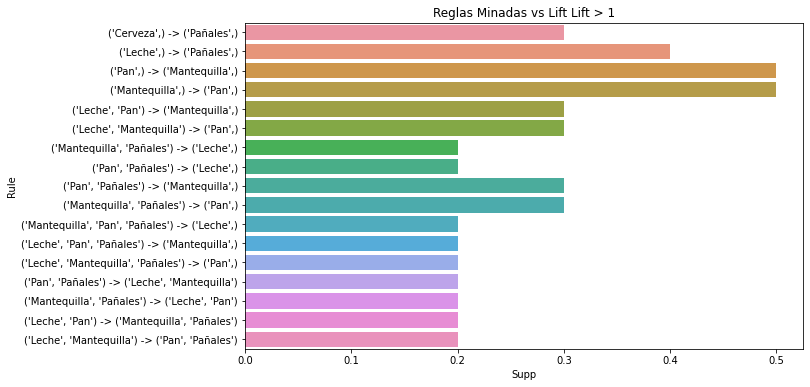

In [103]:
#Filtramos por Lift y Soporte
df_rules_s_2_filt = df_rules_s_2[(df_rules_s_2['Lift'] > 1)]

plt.figure(figsize=(10,6))
# Add title
plt.title("Reglas Minadas vs Lift Lift > 1")
sns.barplot(y=df_rules_s_2_filt.index, x=df_rules_s_2_filt['Supp'])


In [104]:
itemsets_s_3, rules_s_3 = apriori(transactions, min_support=3/N, min_confidence=0.65)
rules_s_3
df_rules_s_3 = build_df_from_rules(rules_s_3)
df_rules_s_3

,Supp,Conf,Lift
Rule,,,
"('Cerveza',) -> ('Pañales',)",0.3,0.750000,1.071429
"('Leche',) -> ('Pañales',)",0.4,0.800000,1.142857
"('Pan',) -> ('Mantequilla',)",0.5,1.000000,2.000000
"('Mantequilla',) -> ('Pan',)",0.5,1.000000,2.000000
"('Leche', 'Pan') -> ('Mantequilla',)",0.3,1.000000,2.000000
"('Leche', 'Mantequilla') -> ('Pan',)",0.3,1.000000,2.000000
"('Mantequilla', 'Pañales') -> ('Leche',)",0.2,0.666667,1.333333
"('Leche', 'Mantequilla') -> ('Pañales',)",0.2,0.666667,0.952381
"('Pan', 'Pañales') -> ('Leche',)",0.2,0.666667,1.333333


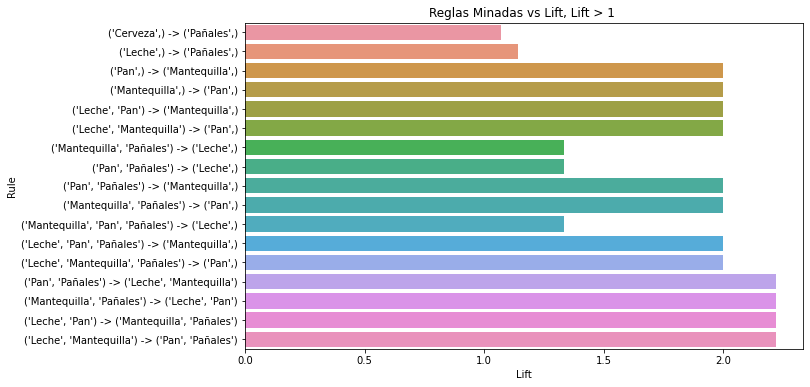

In [105]:
#Filtramos por Lift y Soporte
df_rules_s_3_filt = df_rules_s_2[(df_rules_s_2['Lift'] > 1)]

plt.figure(figsize=(10,6))
# Add title
plt.title("Reglas Minadas vs Lift, Lift > 1 ")
sns.barplot(y=df_rules_s_3_filt.index, x=df_rules_s_3_filt['Lift'])

## 9. 

Importe el conjunto de datos credit-german.csv ([repositorio de machinelearning](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))). Discretice los atributos numéricos en máximo 5 bins de igual tamaño. Aplique el algoritmo de reglas de asociación a este conjunto. Interprete las reglas producidas. Varíe los valores de soporte y de confianza ¿Qué sucede? Interprete las reglas producidas y escoja las que en su concepto son las más interesantes para el problema (justifíque).

In [106]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'

--2021-05-01 02:30:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102000 (100K) [application/x-httpd-php]
Saving to: ‘german.data-numeric.1’

german.data-numeric 100%[===================>]  99.61K  --.-KB/s    in 0.03s   

2021-05-01 02:30:37 (3.39 MB/s) - ‘german.data-numeric.1’ saved [102000/102000]



In [107]:
#!cat german.data-numeric

In [108]:

credit = np.genfromtxt('german.data-numeric')
#X,y = credit[:,:-1], credit[:,-1:].squeeze()
credit

array([[ 1.,  6.,  4., ...,  0.,  1.,  1.],
       [ 2., 48.,  2., ...,  0.,  1.,  2.],
       [ 4., 12.,  4., ...,  1.,  0.,  1.],
       ...,
       [ 4., 12.,  2., ...,  0.,  1.,  1.],
       [ 1., 45.,  2., ...,  0.,  1.,  2.],
       [ 2., 45.,  4., ...,  0.,  1.,  1.]])

In [109]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
#  Discretice los atributos numéricos en máximo 5 bins de igual tamaño
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')


In [110]:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer
# las columnas 1, 3, 9 serán discretizadas en maximo 5 bins
all_cols =  [i for i in range(0, 25, 1)] 
cols_to_discretize = [1, 3, 9]
cols_to_ignore = list(filter(lambda i: not i in cols_to_discretize, all_cols))

'''
ct = ColumnTransformer([('nbin', discretizer, cols_to_discretize),
                        ('passthrough',  'passthrough', cols_to_ignore) ])
'''

ct = ColumnTransformer([('nbin', discretizer, all_cols)])

In [111]:
credit_disc = ct.fit_transform(credit)
credit_disc

<1000x125 sparse matrix of type '<class 'numpy.float64'>'
	with 25000 stored elements in Compressed Sparse Row format>

In [112]:
headers = []
for a in range(1,26):
  for i in range(5):
    headers.append(f'A{a}_{i}')

In [113]:
df_credit_disc = pd.DataFrame.sparse.from_spmatrix(credit_disc, columns=headers, index=range(1000))
df_credit_disc

,A1_0,A1_1,A1_2,A1_3,A1_4,A2_0,A2_1,A2_2,A2_3,A2_4,A3_0,A3_1,A3_2,A3_3,A3_4,A4_0,A4_1,A4_2,A4_3,A4_4,A5_0,A5_1,A5_2,A5_3,A5_4,A6_0,A6_1,A6_2,A6_3,A6_4,A7_0,A7_1,A7_2,A7_3,A7_4,A8_0,A8_1,A8_2,A8_3,A8_4,...,A18_0,A18_1,A18_2,A18_3,A18_4,A19_0,A19_1,A19_2,A19_3,A19_4,A20_0,A20_1,A20_2,A20_3,A20_4,A21_0,A21_1,A21_2,A21_3,A21_4,A22_0,A22_1,A22_2,A22_3,A22_4,A23_0,A23_1,A23_2,A23_3,A23_4,A24_0,A24_1,A24_2,A24_3,A24_4,A25_0,A25_1,A25_2,A25_3,A25_4
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [114]:
df_credit_disc_1 = df_credit_disc.iloc[:10, :10]
df_credit_disc_1

,A1_0,A1_1,A1_2,A1_3,A1_4,A2_0,A2_1,A2_2,A2_3,A2_4
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
transactions_test = df_credit_disc_1.apply(lambda s: s.index[s.values == 1].tolist(), axis=1).values.tolist()
transactions_test

[['A1_0', 'A2_0'],
 ['A1_1', 'A2_3'],
 ['A1_4', 'A2_0'],
 ['A1_0', 'A2_2'],
 ['A1_0', 'A2_1'],
 ['A1_4', 'A2_2'],
 ['A1_4', 'A2_1'],
 ['A1_1', 'A2_2'],
 ['A1_4', 'A2_0'],
 ['A1_1', 'A2_1']]

In [116]:
transactions_9 = df_credit_disc.apply(lambda s: s.index[s.values == 1].tolist(), axis=1).values.tolist()

In [117]:
def build_rules_matrix(transactions):
  
  confianzas =  [i/10 for i in range(5,10)]
  soportes = [i for i in range(500, len(transactions), 100)]
  reglas = []
  itemsets = []

  for s in soportes:
    r_aux = []
    i_aux = []
    for c in confianzas:
      patterns = pyfpgrowth.find_frequent_patterns(transactions, s)
      rules = pyfpgrowth.generate_association_rules(patterns, c)
      r_aux.append(len(rules))
      i_aux.append(len(patterns))
    reglas.append(r_aux)
    itemsets.append(i_aux)


  df_reglas = pd.DataFrame(reglas, index=confianzas, columns=soportes)
  df_items = pd.DataFrame(itemsets, index=confianzas, columns=soportes)
  return df_reglas, df_items


In [120]:
df_reglas_9, df_itemsets_s_9 = build_rules_matrix(transactions_9)

Text(33.0, 0.5, 'Confianza')

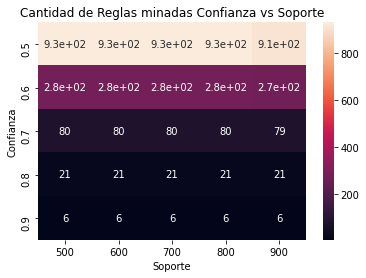

In [121]:

# Add title
plt.title("Cantidad de Reglas minadas Confianza vs Soporte")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_reglas_9, annot=True)

# Add label for horizontal axis
plt.xlabel("Soporte")
plt.ylabel("Confianza")

Text(33.0, 0.5, 'Confianza')

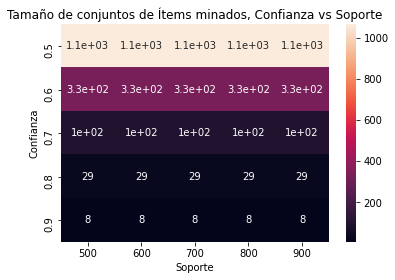

In [122]:
# Add title
plt.title("Tamaño de conjuntos de Ítems minados, Confianza vs Soporte")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_itemsets_s_9, annot=True)

# Add label for horizontal axis
plt.xlabel("Soporte")
plt.ylabel("Confianza")

In [123]:
min_soporte_9 = 0.8*df_credit_disc.shape[0]
min_confianza = 0.8

In [124]:
patterns_9 = pyfpgrowth.find_frequent_patterns(transactions_9, min_soporte_9)
rules_9 = pyfpgrowth.generate_association_rules(patterns_9, min_confianza)
rules_9

{('A13_0', 'A15_0'): (('A22_0',), 0.978021978021978),
 ('A13_0', 'A22_0'): (('A15_0',), 0.9697336561743342),
 ('A15_0',): (('A22_0',), 0.9792315680166147),
 ('A15_0', 'A17_0'): (('A22_0',), 0.9779582366589327),
 ('A15_0', 'A17_0', 'A19_0'): (('A22_0',), 0.9794188861985472),
 ('A15_0', 'A17_0', 'A22_0'): (('A19_0',), 0.9596678529062871),
 ('A15_0', 'A18_4'): (('A19_0', 'A22_0'), 0.9795454545454545),
 ('A15_0', 'A18_4', 'A19_0'): (('A22_0',), 0.9795454545454545),
 ('A15_0', 'A18_4', 'A22_0'): (('A19_0',), 1.0),
 ('A15_0', 'A19_0'): (('A22_0',), 0.980561555075594),
 ('A15_0', 'A19_0', 'A22_0'): (('A18_4',), 0.9493392070484582),
 ('A15_0', 'A22_0'): (('A19_0',), 0.9628844114528102),
 ('A17_0', 'A18_4'): (('A19_0',), 1.0),
 ('A17_0', 'A19_0', 'A22_0'): (('A15_0',), 0.9653937947494033),
 ('A17_0', 'A22_0'): (('A15_0',), 0.9623287671232876),
 ('A18_4', 'A19_0'): (('A22_0',), 0.9779492833517089),
 ('A18_4', 'A19_0', 'A22_0'): (('A15_0',), 0.971815107102593),
 ('A18_4', 'A22_0'): (('A19_0',), 1